In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data!

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


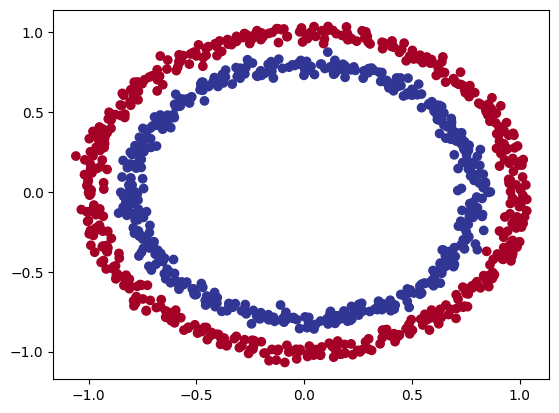

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 6s 6ms/step - loss: 4.2782 - accuracy: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 3.8191 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 3.3172 - accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 2.0347 - accuracy: 0.5113
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9373 - accuracy: 0.5025
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7475 - accuracy: 0.4888
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7368 - accuracy: 0.4900
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7295 - accuracy: 0.4888
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7231 - accuracy: 0.4925
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7178 - accuracy: 0.4950
Epoch 11/

[0.6983882784843445, 0.5450000166893005]

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.2035 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1814 - accuracy: 0.4780
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1786 - accuracy: 0.4800
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1682 - accuracy: 0.4800
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1543 - accuracy: 0.4810


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.4920


[0.7845231294631958, 0.492000013589859]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improve our model

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5050


[0.6994634866714478, 0.5049999952316284]

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


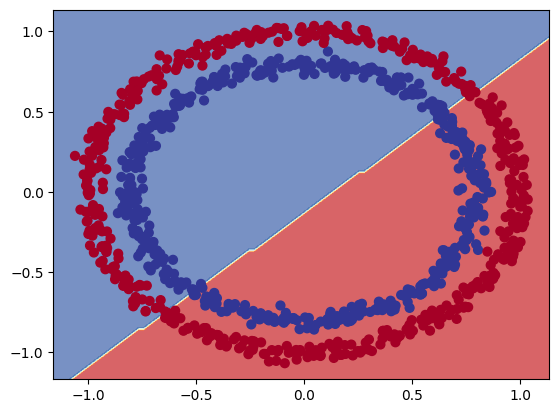

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 366.4757 - mae: 366.4757
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 258.3351 - mae: 258.3351
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 152.8952 - mae: 152.8952
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 53.9285 - mae: 53.9285
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 72.0182 - mae: 72.0182
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 76.3111 - mae: 76.3111
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 49.5569 - mae: 49.5569
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 49.2749 - mae: 49.2749
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 45.4285 - mae: 45.4285
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.6923 - mae: 44.6923
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


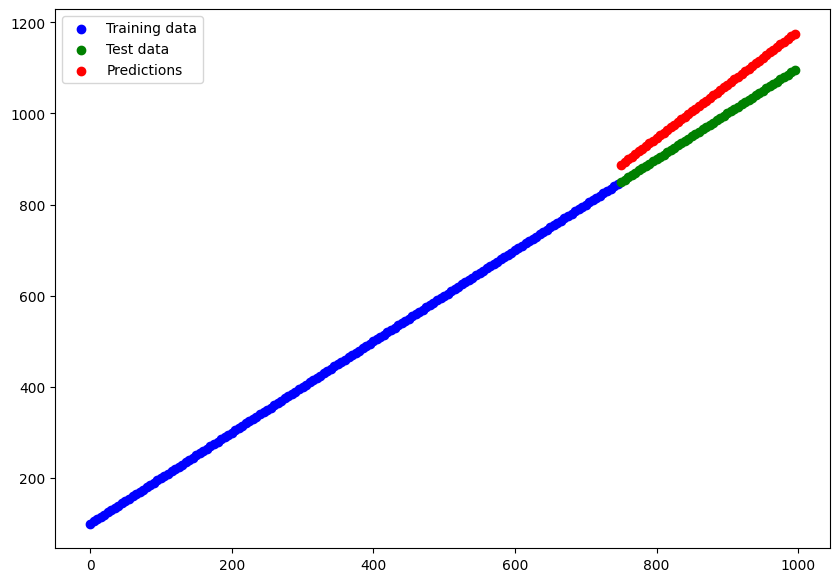

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3015 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2859 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2680 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2664 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2650 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2634 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2618 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2601 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2583 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2565 - accuracy: 0.4760
Epoch 11/

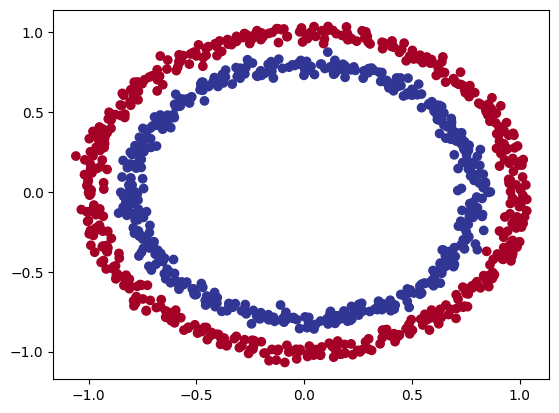

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


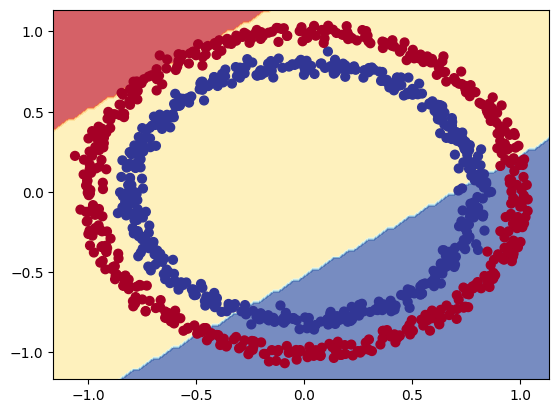

In [ ]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.6425 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5412 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4846 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4593 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4482 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4394 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4321 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4256 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4025 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3910 - accuracy: 0.4720
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.7095 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


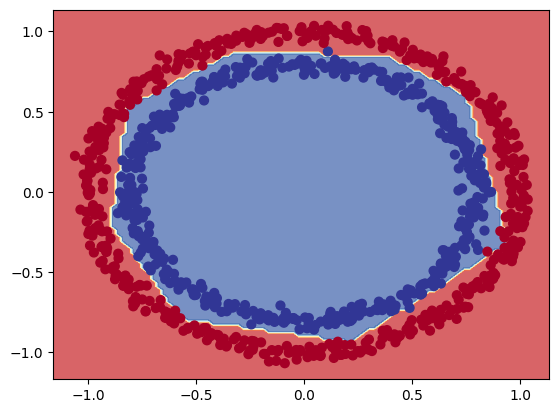

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

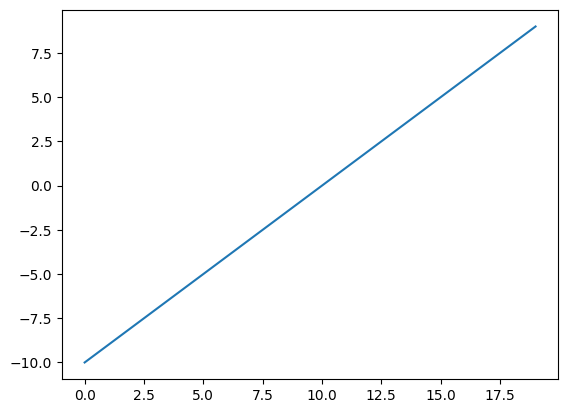

In [ ]:
plt.plot(A)

## Evaluating and Improving our Classification Model

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [ ]:
len(X_train)

800

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 5ms/step - loss: 0.6921 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5275
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5362
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5525
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5775
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6075
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.7025
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6988
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7200
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7925
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9625


[0.15751250088214874, 0.9624999761581421]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.9650


[0.15355247259140015, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


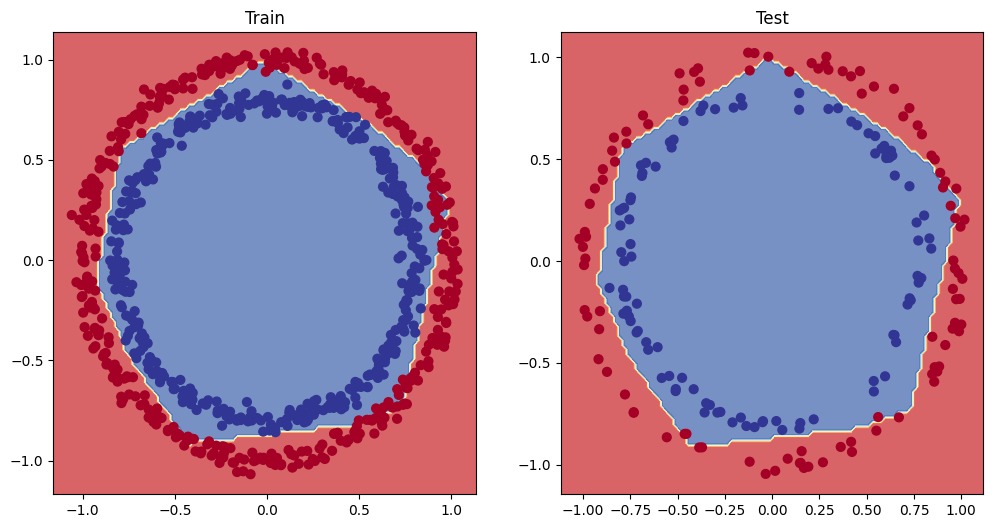

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.6920631527900696,
  0.6888625621795654,
  0.6841137409210205,
  0.6785780191421509,
  0.6728066802024841,
  0.6628426313400269,
  0.6497312784194946,
  0.637351393699646,
  0.6110733151435852,
  0.569283664226532,
  0.5224539637565613,
  0.4843939244747162,
  0.43361127376556396,
  0.38766708970069885,
  0.348035991191864,
  0.3199112117290497,
  0.28872233629226685,
  0.265681654214859,
  0.2446041852235794,
  0.22864387929439545,
  0.21069711446762085,
  0.1903875470161438,
  0.18815341591835022,
  0.17447997629642487,
  0.16369280219078064],
 'accuracy': [0.5074999928474426,
  0.5274999737739563,
  0.5362499952316284,
  0.5525000095367432,
  0.5774999856948853,
  0.6075000166893005,
  0.7024999856948853,
  0.6987500190734863,
  0.7200000286102295,
  0.7925000190734863,
  0.8037499785423279,
  0.8287500143051147,
  0.8537499904632568,
  0.8512499928474426,
  0.8987500071525574,
  0.9212499856948853,
  0.9399999976158142,
  0.9325000047683716,
  0.9362499713897705,
  0.946

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692063,0.50750
1,0.688863,0.52750
2,0.684114,0.53625
3,0.678578,0.55250
4,0.672807,0.57750
5,0.662843,0.60750
6,0.649731,0.70250
7,0.637351,0.69875
8,0.611073,0.72000
9,0.569284,0.79250


Text(0.5, 1.0, 'Model_8 loss cureves')

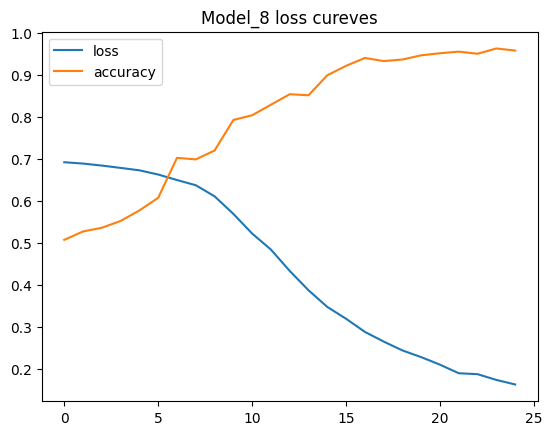

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss cureves")

## Finding the best learning rate

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7260 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7186 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

In [ ]:
pd.DataFrame(history_9.history)

,loss,accuracy,lr
0,0.725961,0.50625,0.000100
1,0.724579,0.50625,0.000112
2,0.723189,0.50500,0.000126
3,0.721660,0.50375,0.000141
4,0.720158,0.50250,0.000158
...,...,...,...
95,0.772568,0.46375,5.623413
96,0.800839,0.50125,6.309574
97,0.956426,0.49625,7.079458
98,0.930541,0.49125,7.943282


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692063,0.50750
1,0.688863,0.52750
2,0.684114,0.53625
3,0.678578,0.55250
4,0.672807,0.57750
5,0.662843,0.60750
6,0.649731,0.70250
7,0.637351,0.69875
8,0.611073,0.72000
9,0.569284,0.79250


<Axes: xlabel='epochs'>

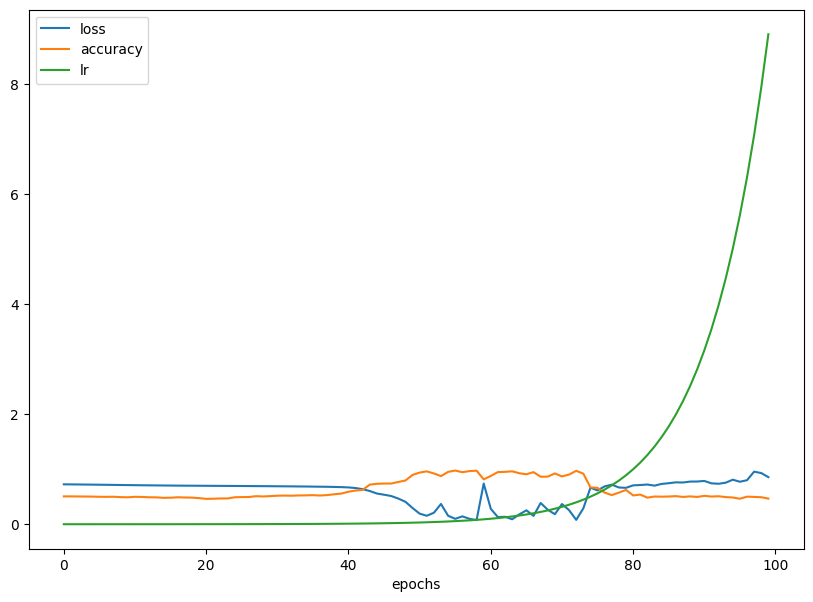

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0, 0.5, 'Loss')

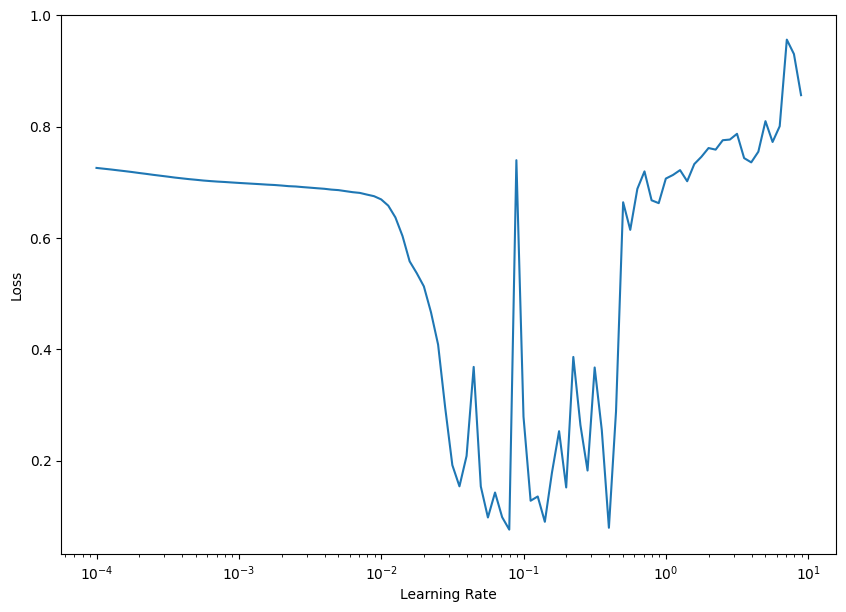

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.5400
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5713
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6175
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.7038
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7300
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8050
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8737
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.9112
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9538
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9737
Epoch 11/25
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9950


[0.037420958280563354, 0.9950000047683716]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.9650


[0.15355247259140015, 0.9649999737739563]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


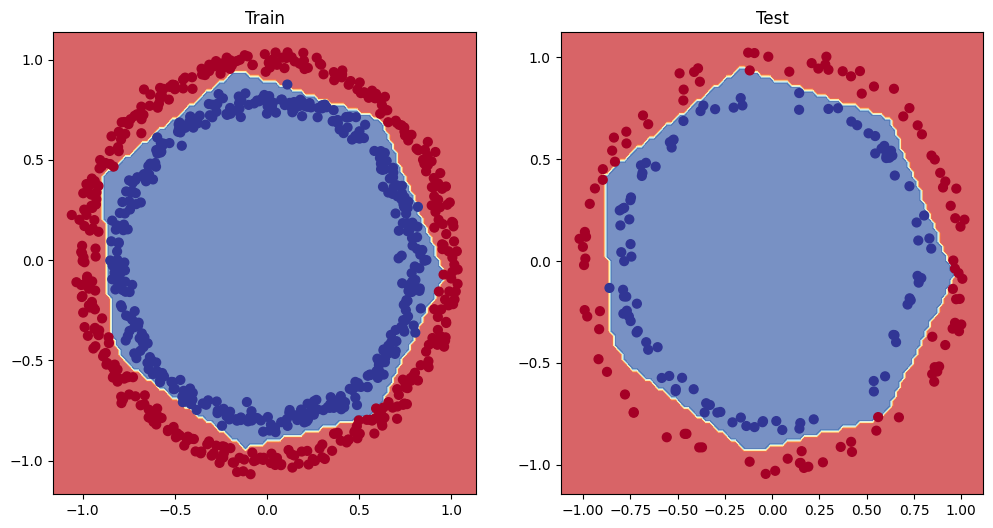

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (scikit-learn)
---



In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9950
Model loss on the test set: 0.037420958280563354
Model accuracy on the test set: 99.50%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.7876167e-01],
       [9.9964833e-01],
       [9.8820043e-01],
       [9.9954432e-01],
       [1.4804342e-02],
       [1.8716730e-05],
       [9.7556710e-01],
       [3.3450329e-03],
       [9.7602159e-01],
       [1.3498282e-03]], dtype=float32)

In [ ]:
tf.round(0.5), tf.round(1.5)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>)

In [ ]:
# y_preds = (y_preds >= 0.5).astype(int)
y_preds = tf.round(y_preds)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, y_preds)

array([[100,   1],
       [  0,  99]])

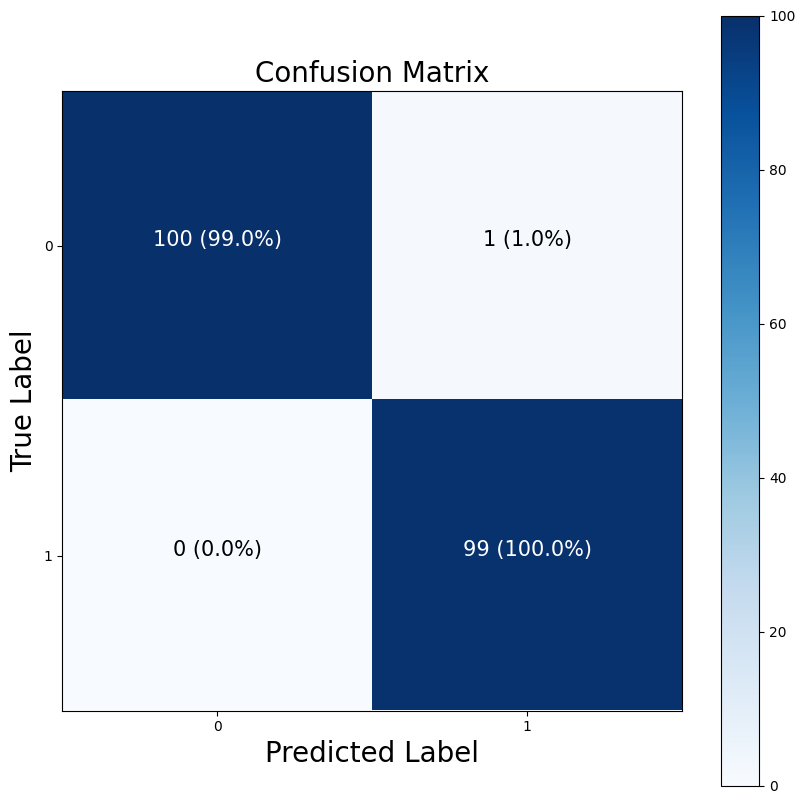

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)
# cm_norm

n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

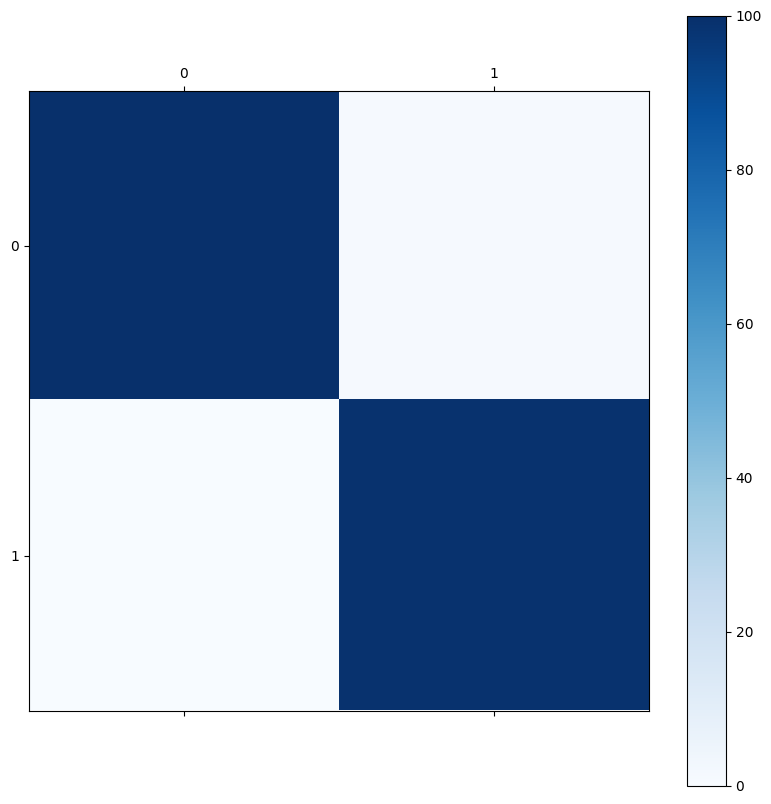

\

# Working with a larger example (multiclass classification)

## Preparing the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

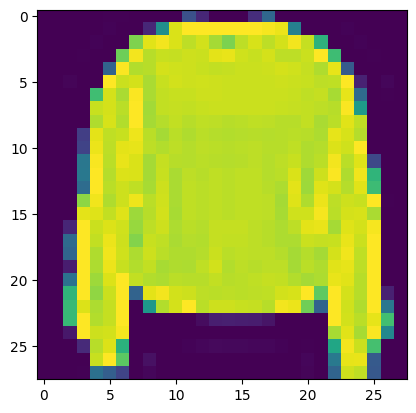

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

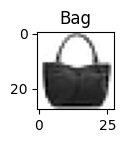

In [ ]:
index_of_choice = 100
plt.figure(figsize=(1, 1))
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


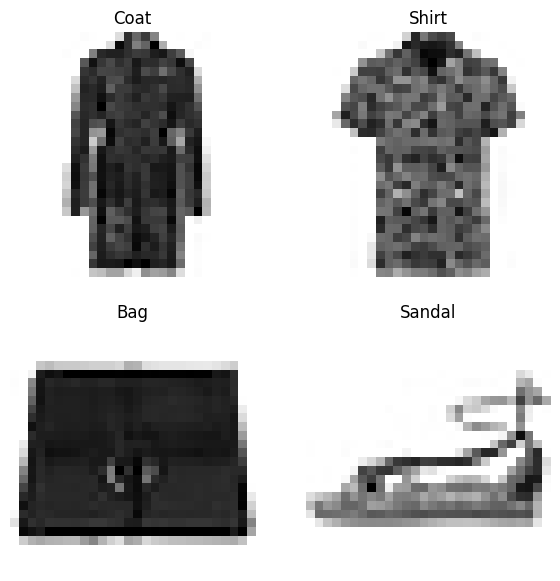

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.4940 - accuracy: 0.1259 - val_loss: 2.0599 - val_accuracy: 0.1881
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8356 - accuracy: 0.2845 - val_loss: 1.6676 - val_accuracy: 0.3498
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5962 - accuracy: 0.3496 - val_loss: 1.6691 - val_accuracy: 0.3711
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4910 - accuracy: 0.3800 - val_loss: 1.4594 - val_accuracy: 0.3995
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4360 - accuracy: 0.3900 - val_loss: 1.4341 - val_accuracy: 0.4005
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4017 - accuracy: 0.3974 - val_loss: 1.4259 - val_accuracy: 0.4052
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3925 - accuracy: 0.4017 - val_loss: 1.3586 - val_accuracy

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3700 - accuracy: 0.4207 - val_loss: 1.4328 - val_accuracy: 0.3816
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3514 - accuracy: 0.4201 - val_loss: 1.3405 - val_accuracy: 0.4134
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3272 - accuracy: 0.4209 - val_loss: 1.3179 - val_accuracy: 0.4285
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3380 - accuracy: 0.4212 - val_loss: 1.3362 - val_accuracy: 0.4289
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3332 - accuracy: 0.4240 - val_loss: 1.4461 - val_accuracy: 0.3820
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3335 - accuracy: 0.4178 - val_loss: 1.3376 - val_accuracy: 0.4175
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3329 - accuracy: 0.4210 - val_loss: 1.3374 - val_accuracy

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Normalization
train_data_norm = train_data / 255
test_data_norm = test_data / 255

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1640 - accuracy: 0.5426 - val_loss: 0.8509 - val_accuracy: 0.6899
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7757 - accuracy: 0.7154 - val_loss: 0.7488 - val_accuracy: 0.7385
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7033 - accuracy: 0.7415 - val_loss: 0.7106 - val_accuracy: 0.7405
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6681 - accuracy: 0.7483 - val_loss: 0.6877 - val_accuracy: 0.7524
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6500 - accuracy: 0.7558 - val_loss: 0.6678 - val_accuracy: 0.7593
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6368 - accuracy: 0.7599 - val_loss: 0.6637 - val_accuracy: 0.7554
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6295 - accuracy: 0.7631 - val_loss: 0.6555 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

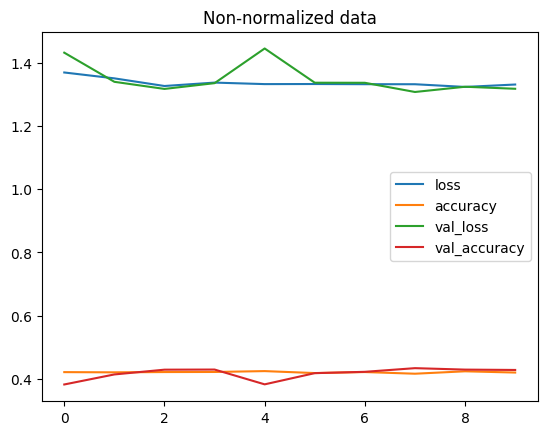

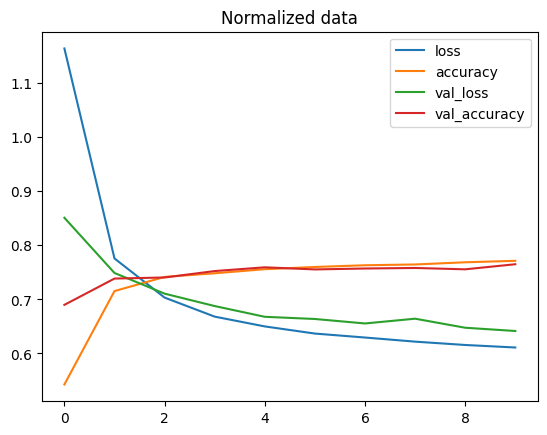

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2706 - accuracy: 0.4886 - val_loss: 0.9237 - val_accuracy: 0.6381 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8440 - accuracy: 0.6542 - val_loss: 0.8231 - val_accuracy: 0.6721 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7663 - accuracy: 0.6908 - val_loss: 0.7547 - val_accuracy: 0.7106 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7001 - accuracy: 0.7265 - val_loss: 0.7076 - val_accuracy: 0.7249 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6684 - accuracy: 0.7348 - val_loss: 0.6895 - val_accuracy: 0.7322 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6535 - accuracy: 0.7406 - val_loss: 0.7083 - val_accuracy: 0.7244 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

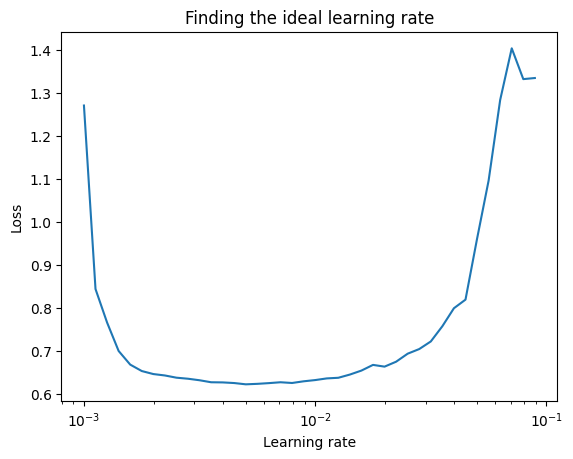

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4082 - accuracy: 0.4518 - val_loss: 1.1025 - val_accuracy: 0.5917
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0008 - accuracy: 0.6271 - val_loss: 0.9692 - val_accuracy: 0.6284
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9172 - accuracy: 0.6524 - val_loss: 0.9190 - val_accuracy: 0.6390
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8787 - accuracy: 0.6662 - val_loss: 0.8900 - val_accuracy: 0.6734
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8530 - accuracy: 0.6799 - val_loss: 0.8747 - val_accuracy: 0.6926
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8338 - accuracy: 0.6944 - val_loss: 0.8655 - val_accuracy: 0.6906
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8180 - accuracy: 0.7029 - val_loss: 0.8570 - val_accuracy:

## Evaluating our multi-class classification model

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)
  # cm_norm

  n_classes = cm.shape[0]
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_14.predict(test_data_norm)

313/313 [==============================] - 1s 1ms/step


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs[:5]

array([[7.6254594e-09, 4.5650217e-04, 1.6236432e-10, 1.8824699e-06,
        1.8800367e-08, 7.7740923e-02, 1.0912618e-08, 7.0879602e-01,
        2.5720815e-06, 2.1300210e-01],
       [7.8878768e-02, 3.4656687e-12, 6.7082256e-01, 1.8577870e-04,
        1.9346137e-02, 2.9270883e-23, 2.3076686e-01, 0.0000000e+00,
        6.6542940e-09, 0.0000000e+00],
       [5.6978784e-06, 9.9223858e-01, 3.5867173e-10, 6.0300487e-03,
        2.0399602e-08, 1.6772945e-03, 3.4368534e-07, 9.6292467e-18,
        2.3025262e-08, 4.7990030e-05],
       [8.3026475e-07, 9.9722767e-01, 2.9699565e-12, 2.7357750e-03,
        1.7334760e-10, 3.3991728e-05, 1.1707013e-08, 5.9163838e-24,
        5.1622859e-11, 1.7299303e-06],
       [2.7946800e-01, 4.3441873e-05, 9.5617294e-02, 1.1051640e-01,
        8.9887679e-02, 5.3161198e-11, 4.2437729e-01, 0.0000000e+00,
        8.9706933e-05, 2.0415173e-26]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([7.6254594e-09, 4.5650217e-04, 1.6236432e-10, 1.8824699e-06,
        1.8800367e-08, 7.7740923e-02, 1.0912618e-08, 7.0879602e-01,
        2.5720815e-06, 2.1300210e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[685,   2,  50, 124,  29,   2,  96,   0,  12,   0],
       [  2, 913,   2,  63,   6,   1,  11,   0,   2,   0],
       [ 19,   1, 585,  21, 223,   2, 134,   0,  15,   0],
       [ 39,  11,   8, 831,  35,   3,  67,   0,   6,   0],
       [  1,   0, 165,  45, 658,   0,  91,   0,  40,   0],
       [  0,   6,   0,   1,   0, 823,   0, 126,  25,  19],
       [143,   3, 246,  83, 304,   2, 189,   0,  30,   0],
       [  0,   0,   0,   0,   0,  88,   0, 851,   1,  60],
       [  0,   2,   7,  13,  42,  26,   5,   2, 901,   2],
       [  0,   2,   0,   0,   1,   5,   0, 142,   0, 850]])

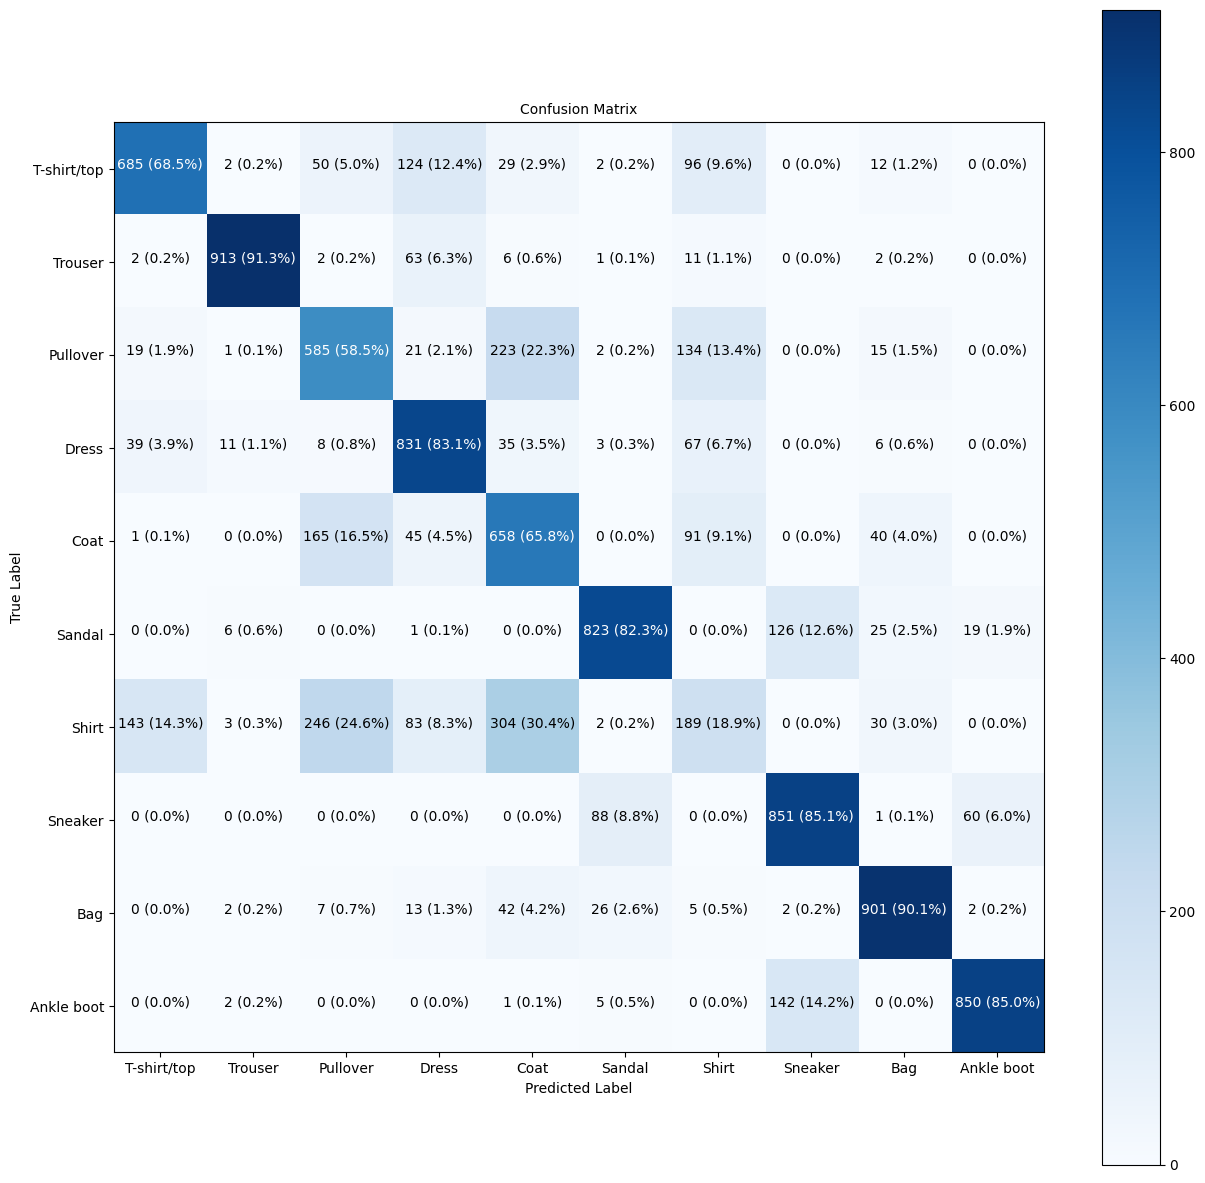

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  